In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving math_8th.csv to math_8th.csv
Saving reading_8th.csv to reading_8th.csv


In [2]:
math=pd.read_csv('math_8th.csv')

In [3]:
math.shape

(45, 12)

In [4]:
import pandas as pd
math=pd.get_dummies(math,columns=['Ethnicity'])

In [5]:
math_analysis=math.iloc[:,2:]
math_analysis.head()
x_math=math_analysis.drop('Math 2019 STAAR Percent Score',axis=1)
y_math=math_analysis['Math 2019 STAAR Percent Score']
x_math.shape

(45, 11)

In [6]:
from sklearn.model_selection import train_test_split
X_train_math, X_test_math, y_train_math, y_test_math = train_test_split(x_math, y_math, test_size=0.2, random_state=42)


In [7]:
X_train_math.shape
X_test_math.shape

(9, 11)

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_math, y_train_math)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
X_train_math.head()


,ECD,LEP,SpEd,Math Fall 2017 STAAR Practice Test Score,Math Spring 2018 STAAR Practice Test Score,Math Spring 2018 STAAR Percent Score \n,Math Fall 2018 STAAR Practice Test Percent Score,Math Spring 2019 STAAR Practice Test Percent Score,Ethnicity_B,Ethnicity_H,Ethnicity_W
3,1,0,0,29.0,22.0,50.0,35.000000,24.0,1,0,0
6,1,0,1,35.0,33.0,22.0,23.000000,21.0,1,0,0
24,1,0,0,21.0,31.0,25.0,29.657895,21.0,1,0,0
32,1,1,0,15.0,33.0,39.0,31.000000,26.0,0,1,0
19,1,1,0,38.0,42.0,53.0,23.000000,24.0,0,1,0


In [10]:
regressor.predict(X_test_math)
#regressor.coef_

array([17.5098878 , 19.04189505, 46.06540591, 34.77001431, 31.62968282,
       37.90890888, 36.50609059, 33.32171147, 50.00515763])

In [11]:
import numpy as np
Rss_math=sum(np.square(y_test_math-regressor.predict(X_test_math)))
abs(y_test_math-regressor.predict(X_test_math))
#y_test_math-regressor.predict(X_test_math)
Rss_math
regressor.score(X_test_math,y_test_math)

0.3618268467852408

In [12]:
 pd.DataFrame({'Actual': y_test_math, 'Predicted': regressor.predict(X_test_math)})

,Actual,Predicted
39,16.0,17.509888
25,18.0,19.041895
26,39.0,46.065406
43,42.0,34.770014
35,32.0,31.629683
41,55.0,37.908909
4,29.0,36.506091
12,39.0,33.321711
8,34.0,50.005158


In [15]:
#Saving the model
import pickle
final_math= pickle.dump(regressor,open("math_8th",'wb'))

In [ ]:
pred_values=regressor.predict(X_test_math)
pd.DataFrame({'Actual':y_test_math,'Predicted':pred_values})

pred_values=list(pred_values)
diff=list(abs(pred_values-y_test_math))
cutoff=15
count=0


for i in range(0,len(diff)):
  if (diff[i]<cutoff):
    count=count+1
print(count/len(diff)*100)

77.77777777777779


In [ ]:
#Testing the loaded model
loaded_model=pickle.load(open("test",'rb'))
loaded_model.score(X_test_math,y_test_math)

0.3618268467852408

In [16]:
#Randomforest
from sklearn.ensemble import RandomForestRegressor
RandomForestRegModel= RandomForestRegressor()
RandomForestRegModel.fit(X_train_math,y_train_math)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [17]:
pred_randomforest=RandomForestRegModel.predict(X_test_math)
RandomForestRegModel.score(X_test_math,y_test_math)

0.23605074484339197

In [18]:
pd.DataFrame({'Actual': y_test_math, 'Predicted': pred_randomforest})

,Actual,Predicted
39,16.0,25.30
25,18.0,26.69
26,39.0,46.06
43,42.0,39.04
35,32.0,29.55
41,55.0,36.00
4,29.0,38.68
12,39.0,36.34
8,34.0,48.16


In [19]:
#Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
pre_process = PolynomialFeatures(degree=2)
X_poly = pre_process.fit_transform(X_train_math)
X_poly[30].shape

(78,)

In [20]:
poly_reg=LinearRegression()
poly_fit=poly_reg.fit(X_poly,y_train_math)
test_poly=pre_process.fit_transform(X_test_math)
poly_predict=poly_fit.predict(test_poly)
poly_fit.score(test_poly,y_test_math)

-139.9219472580671

In [21]:
import matplotlib.pyplot as plt
regressor1.predict(X_test_math).shape
plt.plot(regressor.coef_,'r+')

NameError: ignored

Reading

In [22]:
reading=pd.read_csv('reading_8th.csv')
import pandas as pd
reading=pd.get_dummies(reading,columns=['Ethnicity'])

In [23]:
reading.head()

,LocalId,Grade,ECD,LEP,SpEd,Reading Fall 2017 STAAR Practice Test Score,Reading Spring 2018 STAAR Practice Test Score\n,Reading Spring 2018 STAAR Percent Score \n,Reading Fall 2018 STAAR Practice Test Percent Score,Reading Spring 2019 STAAR Practice Test Percent Score,Reading 2019 STAAR Percent Score,Ethnicity_B,Ethnicity_H,Ethnicity_W
0,9712,8,1,0,0,35.000,34.0,34.0,35.0,33.0,23.0,1,0,0
1,9867,8,1,0,0,26.000,21.0,47.0,35.0,30.0,33.0,1,0,0
2,9868,8,1,1,0,42.975,37.0,71.0,59.0,48.0,53.0,0,1,0
3,9866,8,1,0,0,23.000,37.0,55.0,29.0,40.0,28.0,1,0,0
4,3202,8,1,0,0,42.975,53.0,61.0,65.0,40.0,38.0,1,0,0


In [24]:
reading_analysis=reading.iloc[:,2:]
reading_analysis.head()
x_reading=reading_analysis.drop('Reading 2019 STAAR Percent Score',axis=1)
y_reading=reading_analysis['Reading 2019 STAAR Percent Score']
x_reading.shape

(45, 11)

In [25]:
from sklearn.model_selection import train_test_split
X_train_reading, X_test_reading, y_train_reading, y_test_reading = train_test_split(x_reading, y_reading, test_size=0.33, random_state=42)

In [26]:
y_train_reading

13    65.0
42    25.0
15    75.0
9     53.0
16    73.0
37    38.0
31    43.0
27    38.0
0     23.0
30    28.0
29    25.0
5     13.0
11    25.0
33    28.0
1     33.0
40    68.0
21    83.0
2     53.0
34    33.0
23    40.0
36    83.0
10    55.0
22    20.0
18    35.0
44    58.0
20    33.0
7     43.0
14    65.0
28    30.0
38    30.0
Name: Reading 2019 STAAR Percent Score, dtype: float64

In [27]:
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X_train_reading, y_train_reading)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
import numpy as np
Rss_reading=sum(np.square(y_test_reading-regressor1.predict(X_test_reading)))
Rss_reading

2187.657885814406

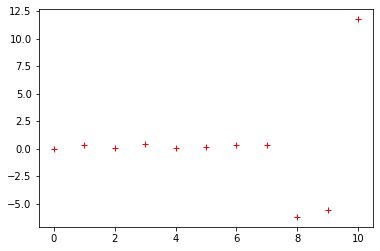

In [ ]:
#Extract important features

import matplotlib.pyplot as plt
regressor1.predict(X_test_reading).shape
plt.plot(regressor1.coef_,'r+')

#9,10&11th features are quite important in deciding the important features

In [ ]:
pred_values=regressor1.predict(X_test_reading)
pd.DataFrame({'Actual':y_test_reading,'Predicted':pred_values})

pred_values=list(pred_values)
diff=list(abs(pred_values-y_test_reading))
cutoff=15
count=0


for i in range(0,len(diff)):
  if (diff[i]<cutoff):
    count=count+1
print(count/len(diff)*100)

86.66666666666667


In [29]:
import pickle
final_math= pickle.dump(regressor1,open("reading_8th",'wb'))